In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/Users/wafic/anaconda/envs/py2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
titanic = pd.read_csv('titanic_data.csv')
prosper = pd.read_csv('prosperLoanData.csv')

In [5]:
sns.set_style("whitegrid")

# A. Plotting univariate distributions with Prosper Loans
These plots are used when the main variables are continous variables
https://seaborn.pydata.org/tutorial/distributions.html

### 1. Histograms

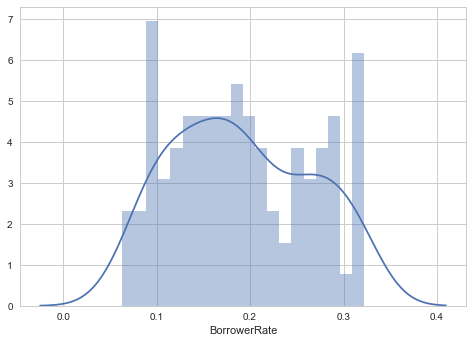

In [7]:
sns.distplot(prosper.BorrowerRate.head(100), bins=20, kde=True, rug=False, hist=True)

### 2. Kernel density estimaton

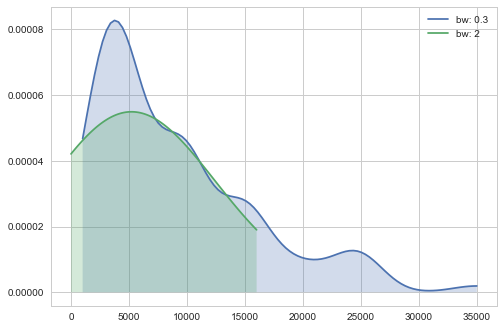

In [51]:
sns.kdeplot(prosper.LoanOriginalAmount.head(100), shade=True, bw=0.3, label="bw: 0.3")
sns.kdeplot(prosper.StatedMonthlyIncome.head(100), shade=True, bw=2, label="bw: 2")

# B. Plotting bivariate distributions with Prosper Loans

### 1. Scatter plots

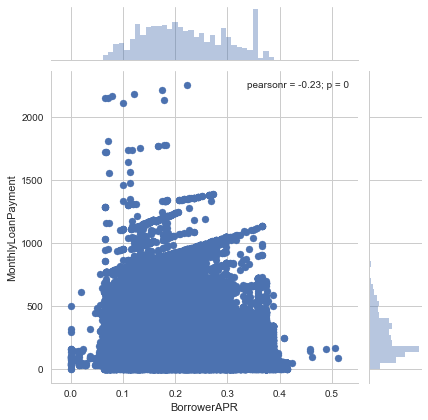

In [35]:
prosper_cont = prosper[['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 'ProsperRating (numeric)', \
                       'MonthlyLoanPayment', 'PercentFunded']].fillna(0)

sns.jointplot(x="BorrowerAPR", y="MonthlyLoanPayment", data=prosper_cont)

### 2. Hexbin plots

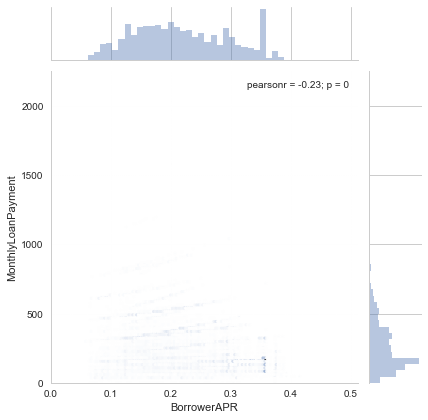

In [29]:
sns.jointplot(x="BorrowerAPR", y="MonthlyLoanPayment", data=prosper_cont, kind="hex")

### 3. KDE

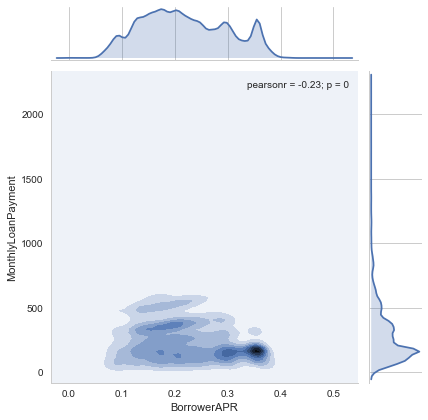

In [30]:
sns.jointplot(x="BorrowerAPR", y="MonthlyLoanPayment", data=prosper_cont, kind="kde")

### 4. Visualizing pairwise relationships in a dataset

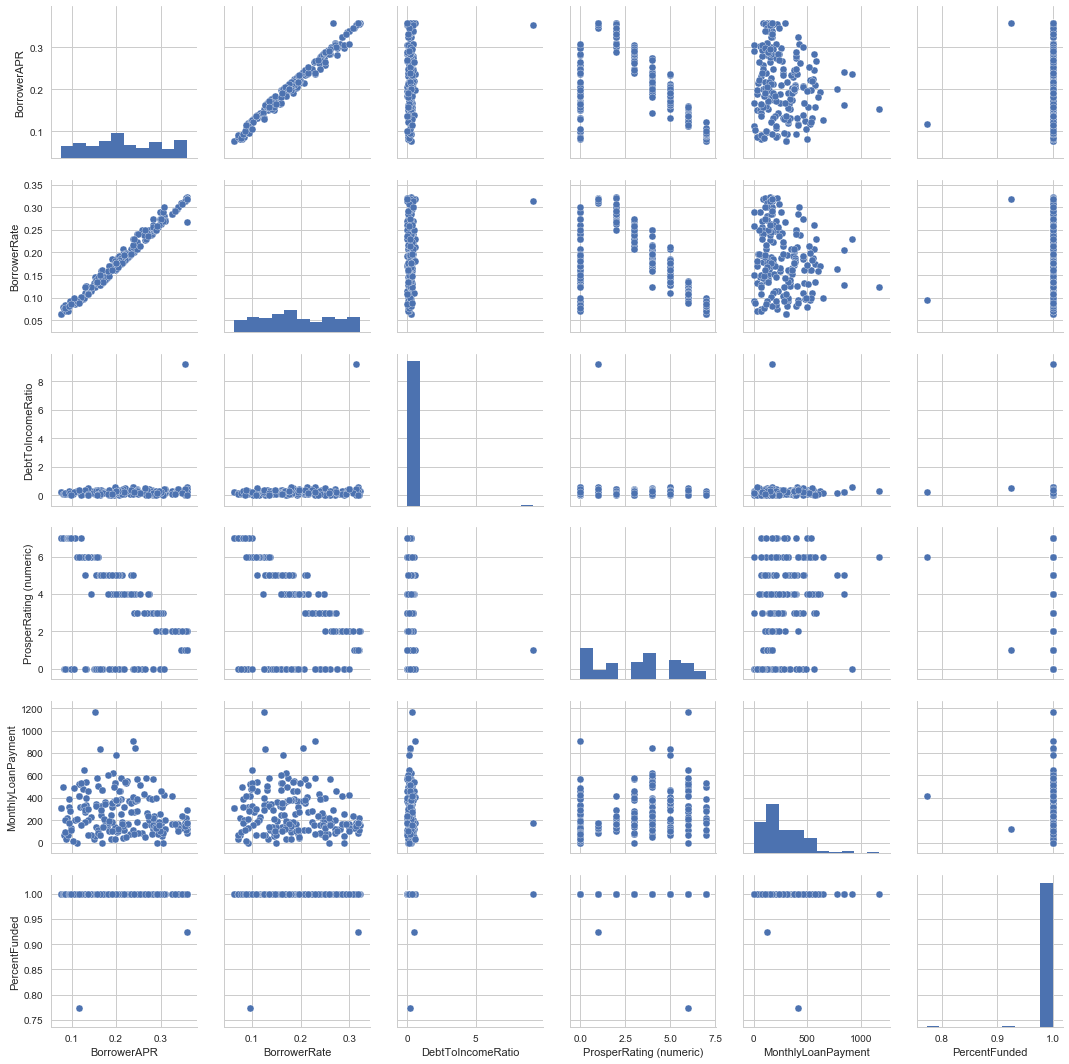

In [8]:
prosper_cont = prosper[['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 'ProsperRating (numeric)', \
                       'MonthlyLoanPayment', 'PercentFunded']].fillna(0)

sns.pairplot(prosper_cont.head(200))

# C. Plotting with categorical data with Titanic dataset
When the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won’t work we use the below
https://seaborn.pydata.org/tutorial/categorical.html

It’s useful to divide seaborn’s categorical plots into three groups: 
- Those that show each observation at each level of the categorical variable (swarmplot and stripplot)
- Those that show an abstract representation of each distribution of observations (boxplot and violinplot)
- Those that apply a statistical estimation to show a measure of central tendency and confidence interval (barplot and pointplot) 


### 1. Categorical scatterplots

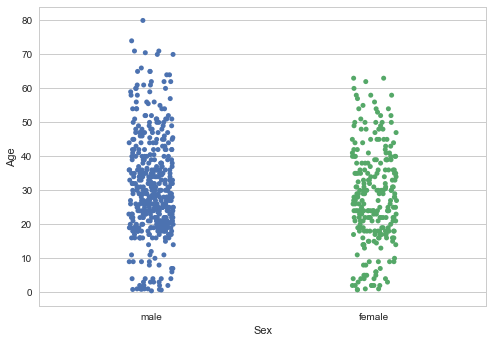

In [54]:
sns.stripplot(x="Sex", y="Age", data=titanic, jitter=True)

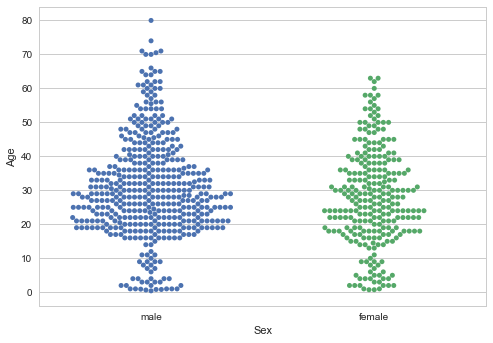

In [55]:
# Similar to the above but plots every point avoiding any overlap
sns.swarmplot(x="Sex", y="Age", data=titanic)

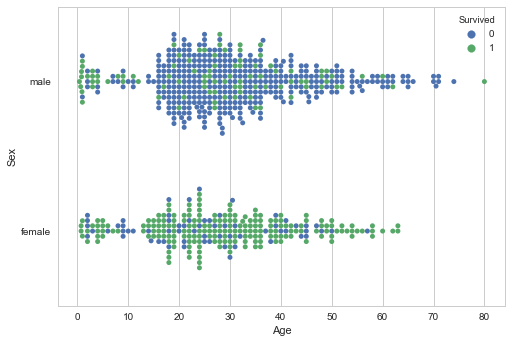

In [56]:
sns.swarmplot(x="Age", y="Sex", hue='Survived', data=titanic)

### 2. Distributions of observations within categories

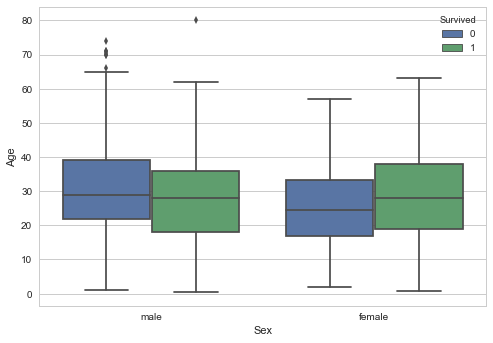

In [58]:
sns.boxplot(x="Sex", y="Age", hue="Survived", data=titanic)

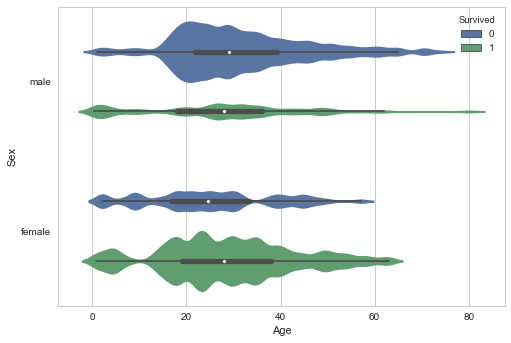

In [63]:
#  Because the violinplot uses a KDE, there are some other parameters that may need tweaking,
# adding some complexity relative to the straightforward boxplot
sns.violinplot(x="Age", y="Sex", hue="Survived", data=titanic, bw=.1, scale="count")

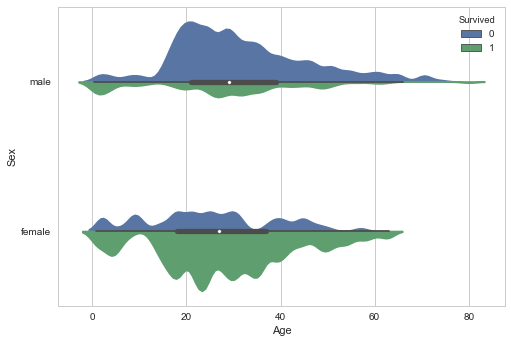

In [65]:
# It’s also possible to “split” the violins when the hue parameter has only two levels, 
# which can allow for a more efficient use of space
sns.violinplot(x="Age", y="Sex", hue="Survived", data=titanic, bw=.1, scale="count", split=True)

### 3. Statistical estimation within categories

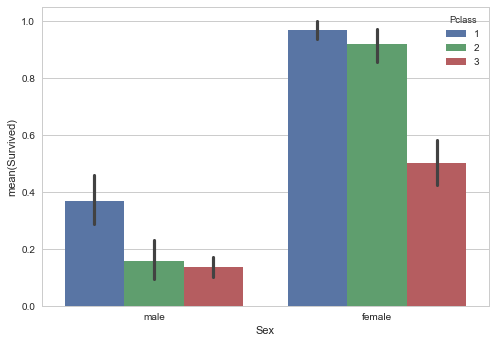

In [23]:
# function operates on a full dataset and shows an arbitrary estimate, 
# using the mean by default
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic)

In [46]:
titanic.Deck = titanic.Cabin.str[0:1]

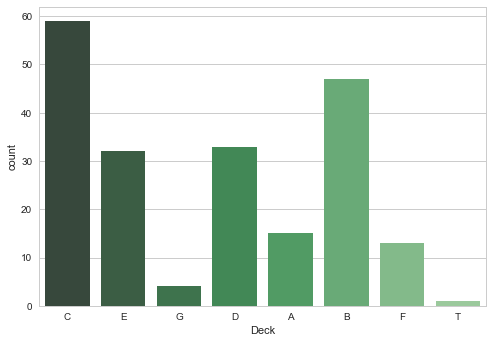

In [47]:
# number of observations in each category rather than computing a 
# statistic for a second variable
titanic['Deck'] = titanic.Cabin.str[0:1]
sns.countplot(x='Deck', data=titanic, palette="Greens_d")

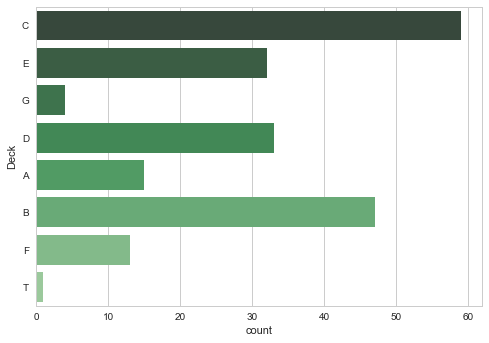

In [48]:
sns.countplot(y='Deck', data=titanic, palette="Greens_d")

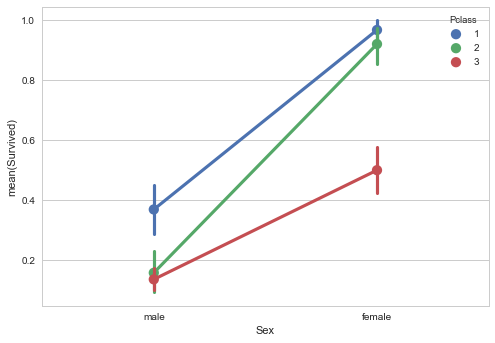

In [7]:
# Same as barplot but rather than the full bar, will show point estimate and confidence interval, 
# also connects the points of different categories to show relationship

sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=titanic)

### 4. Drawing multi-panel categorical plots (Draw a categorical plot onto a FacetGrid)

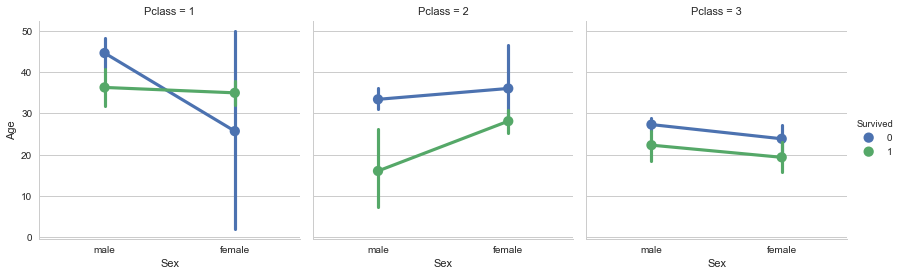

In [62]:
# the higher-level function factorplot(), which combines these functions with a FacetGrid() to add 
# the ability to examine additional categories through the larger structure of the figure. 
# By default, factorplot() produces a pointplot()
# The main advantage of using a factorplot() is that it is very easy to “facet” the plot and 
# investigate the role of other categorical variables:
sns.factorplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=titanic)

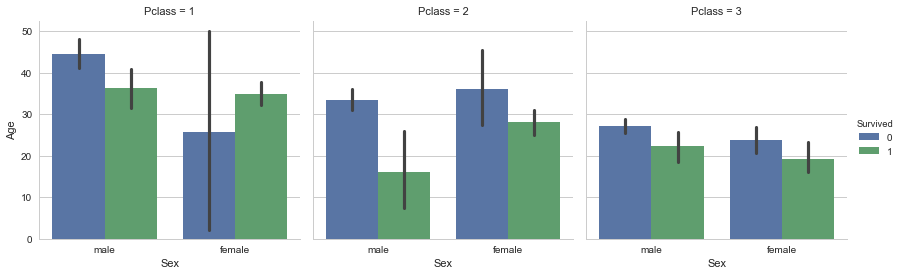

In [33]:
sns.factorplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=titanic, kind="bar")

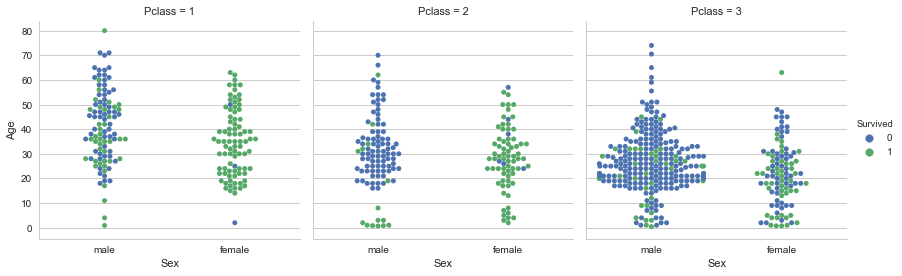

In [17]:
sns.factorplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=titanic, kind="swarm")

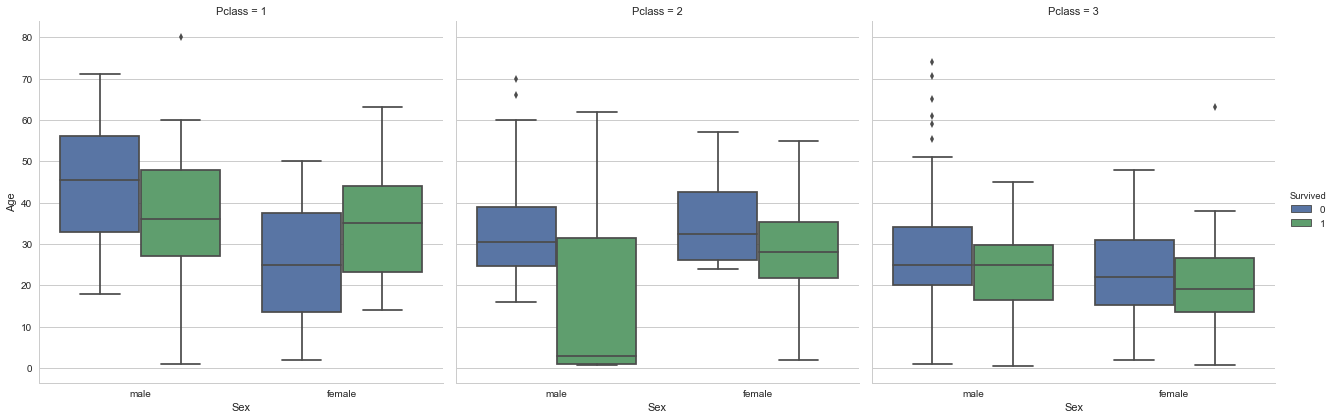

In [20]:
sns.factorplot(x="Sex", y="Age", hue="Survived", col="Pclass", data=titanic, kind="box", size=6, aspect=1)

# D. Visualizing linear relationships with Prosper Loans
https://seaborn.pydata.org/tutorial/regression.html

### 1. Regression plot

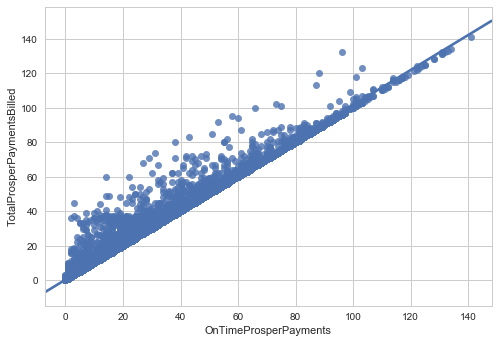

In [31]:
sns.regplot(x="OnTimeProsperPayments", y="TotalProsperPaymentsBilled", data=prosper)

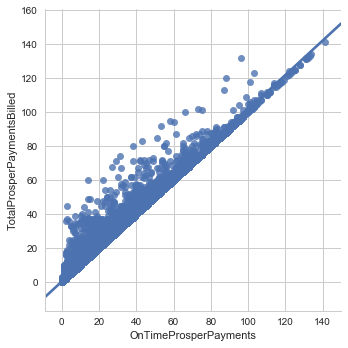

In [32]:
sns.lmplot(x="OnTimeProsperPayments", y="TotalProsperPaymentsBilled", data=prosper)

### 2. Linear Model plots

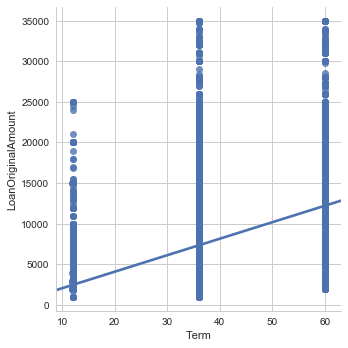

In [29]:
sns.lmplot(x="Term", y="LoanOriginalAmount", data=prosper, x_jitter=.05)

### 3. Conditioning on other variables
The plots above show many ways to explore the relationship between a pair of variables. Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?” This is where the difference between regplot() and lmplot() appears. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

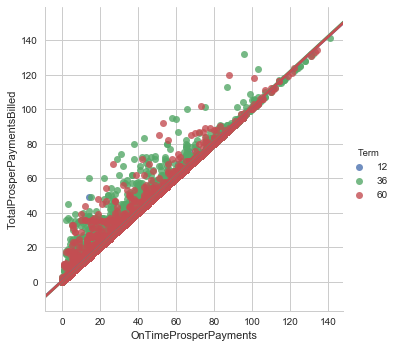

In [37]:
sns.lmplot(x="OnTimeProsperPayments", y="TotalProsperPaymentsBilled", hue="Term", data=prosper)

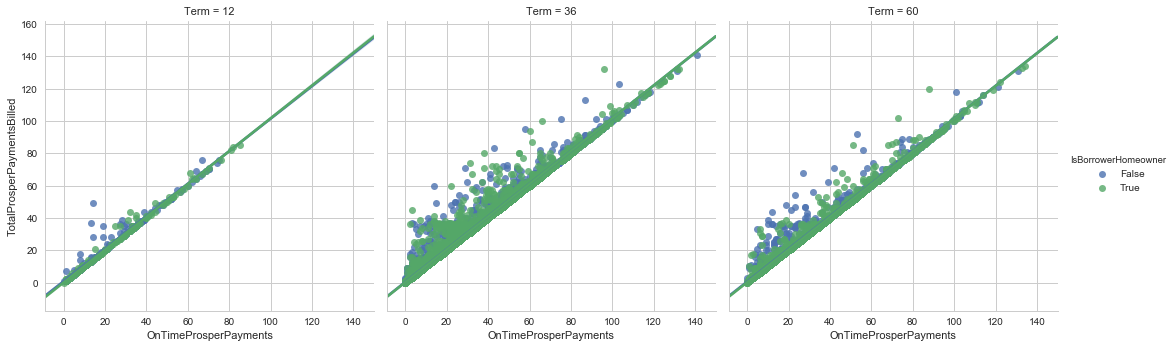

In [35]:
sns.lmplot(x="OnTimeProsperPayments", y="TotalProsperPaymentsBilled", hue="IsBorrowerHomeowner", \
           col='Term', data=prosper)

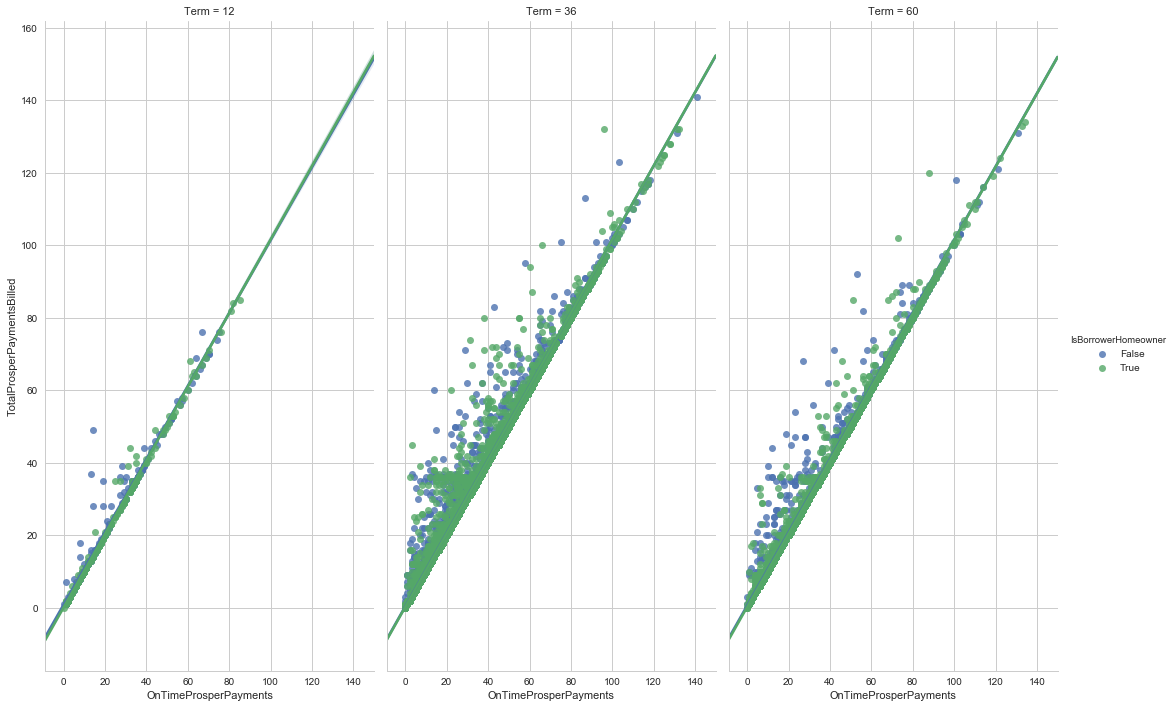

In [43]:
# the size and shape of the lmplot() figure is controlled through the FacetGrid interface using 
# the size and aspect parameters
sns.lmplot(x="OnTimeProsperPayments", y="TotalProsperPaymentsBilled", hue="IsBorrowerHomeowner", \
           col='Term', data=prosper, size=10, aspect=.5)

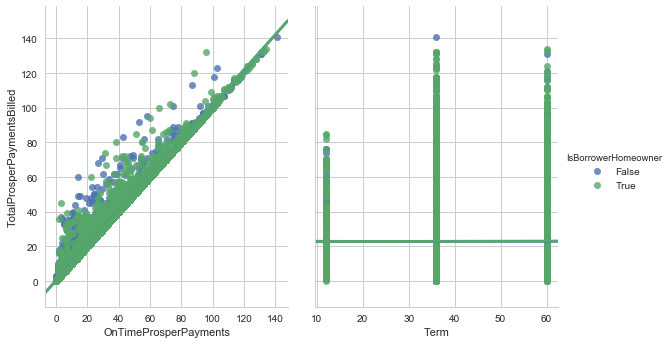

In [51]:
# Using the pairplot() function with kind="reg" combines regplot() and PairGrid to show the 
# linear relationship between variables in a dataset
sns.pairplot(prosper, x_vars=["OnTimeProsperPayments", "Term"], y_vars=["TotalProsperPaymentsBilled"],
             hue="IsBorrowerHomeowner", size=5, aspect=.8, kind="reg")

# E. Plotting on data-aware grids
https://seaborn.pydata.org/tutorial/axis_grids.html
When exploring medium-dimensional data, a useful approach is to draw multiple instances of the same plot on different subsets of your dataset. This technique is sometimes called either “lattice”, or “trellis” plotting, and it is related to the idea of “small multiples”.
Some seaborn functions (such as lmplot(), factorplot(), and pairplot()) also use them behind the scenes.

### 1. Plotting small multiples of data subsets
The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

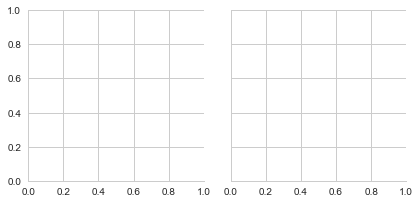

In [53]:
g = sns.FacetGrid(titanic, col="Sex")

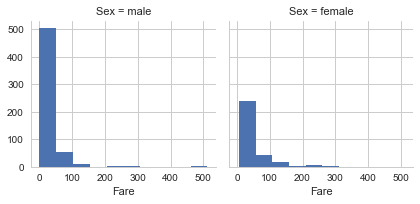

In [54]:
g = sns.FacetGrid(titanic, col="Sex")
g.map(plt.hist, "Fare")

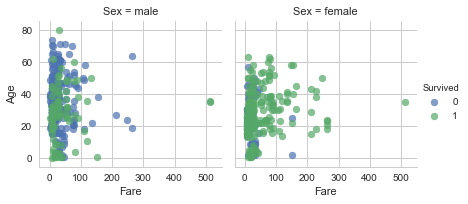

In [40]:
g = sns.FacetGrid(titanic, col="Sex", hue="Survived")
g.map(plt.scatter, "Fare", "Age", alpha=.7)
g.add_legend()

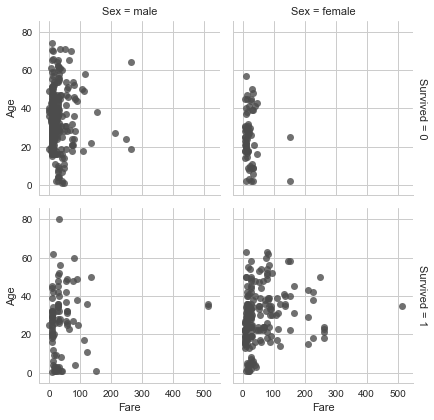

In [43]:
g = sns.FacetGrid(titanic, row="Survived", col="Sex", margin_titles=True)
g.map(sns.regplot, "Fare", "Age", color=".3", fit_reg=False, x_jitter=.1)

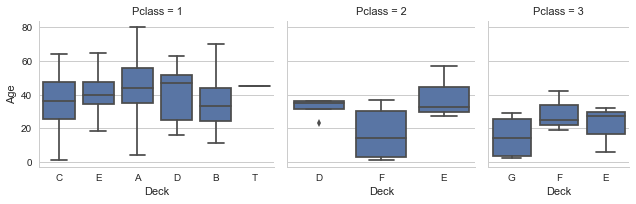

In [53]:
g = sns.FacetGrid(titanic, col="Pclass", sharex=False, gridspec_kws={"width_ratios": [5, 4, 3]})
g.map(sns.boxplot, "Deck", "Age")

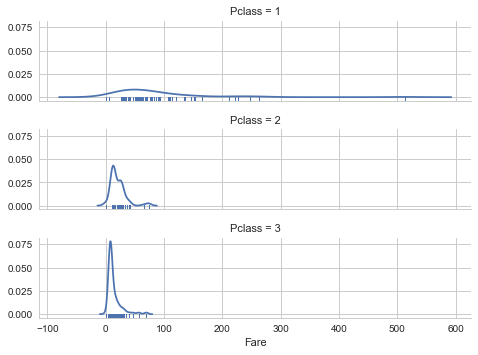

In [57]:
g = sns.FacetGrid(titanic, row="Pclass", size=1.7, aspect=4)
g.map(sns.distplot, "Fare", hist=False, rug=True)

### 2. VisualPlotting pairwise relationships in a datasetizing pairwise relationships in a dataset 
PairGrid also allows you to quickly draw a grid of small subplots using the same plot type to visualize data in each. In a PairGrid, each row and column is assigned to a different variable, so the resulting plot shows each pairwise relationship in the dataset. This style of plot is sometimes called a “scatterplot matrix”, as this is the most common way to show each relationship, but PairGrid is not limited to scatterplots.

It’s important to understand the differences between a FacetGrid and a PairGrid. In the former, each facet shows the same relationship conditioned on different levels of other variables. In the latter, each plot shows a different relationship (although the upper and lower triangles will have mirrored plots). Using PairGrid can give you a very quick, very high-level summary of interesting relationships in your dataset.

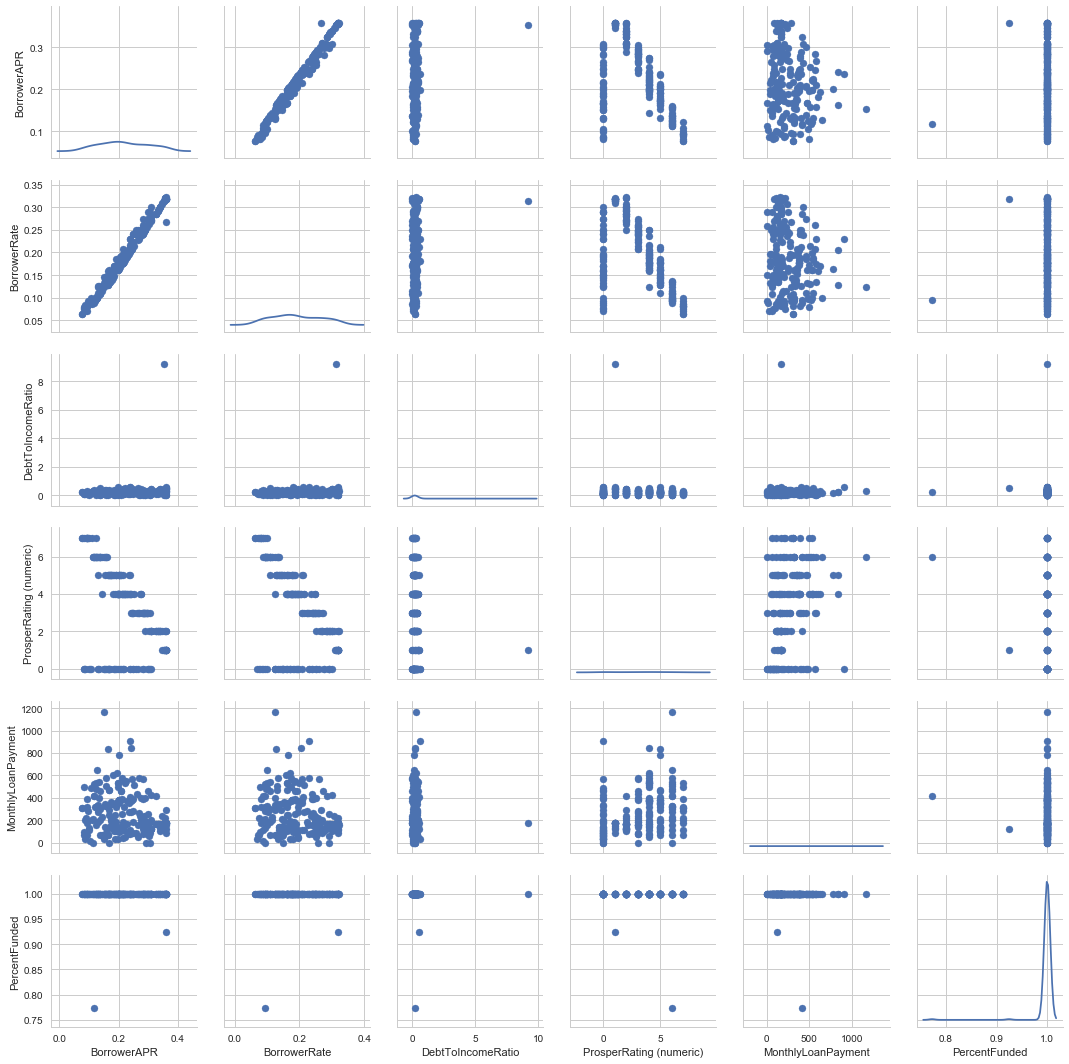

In [31]:
# To plot multiple pairwise bivariate distributions in a dataset, you can 
# use the PairGrid() function.
g = sns.PairGrid(prosper_cont.head(200))
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter);

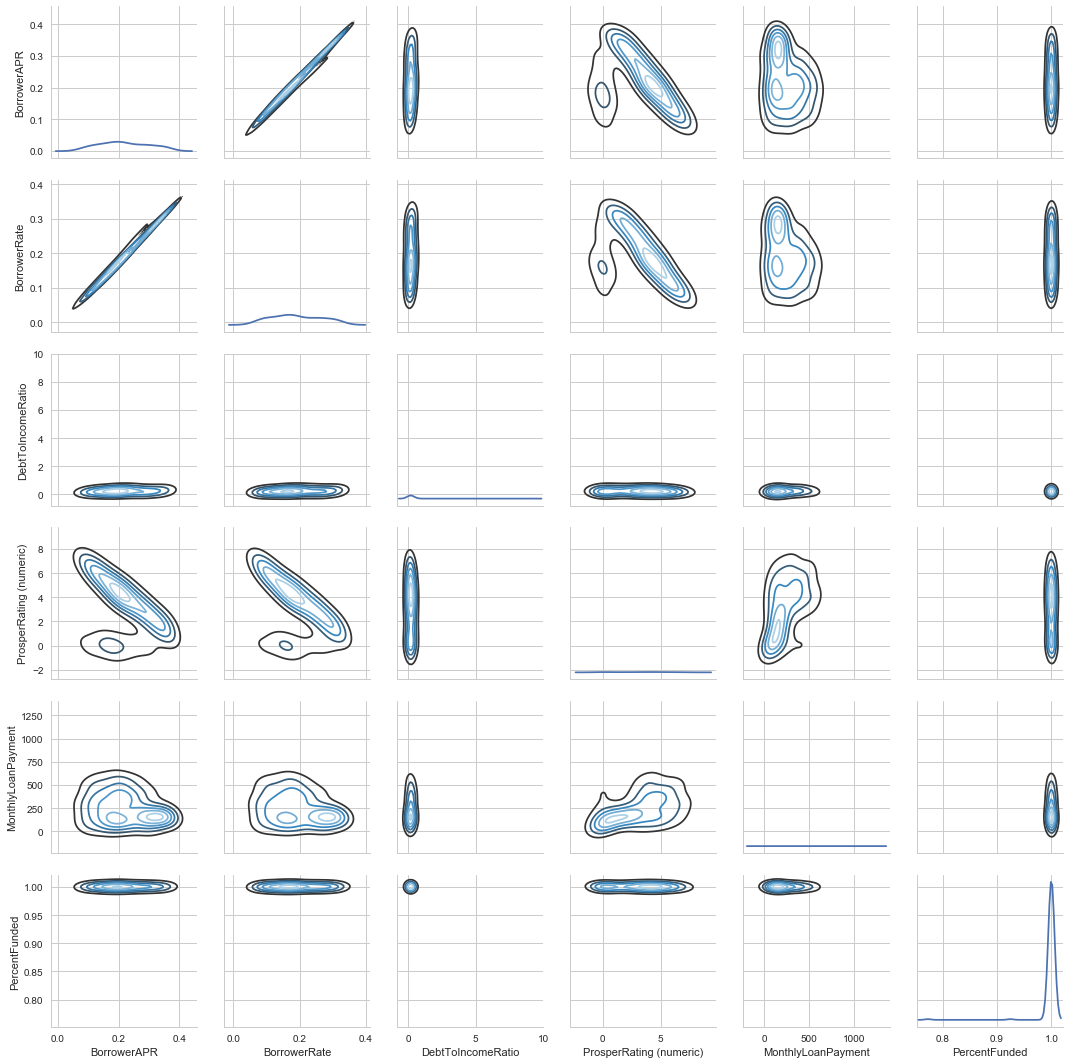

In [32]:
# Using KDE instead of scatter plot
g = sns.PairGrid(prosper_cont.head(200))
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);